In [2]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow.keras import utils
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from skimage.transform import rescale, resize, downscale_local_mean
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!pip install astroNN

     |████████████████████████████████| 9.3 MB 4.3 MB/s 
     |████████████████████████████████| 4.4 MB 35.7 MB/s 
     |████████████████████████████████| 802 kB 42.0 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 3.2 MB 40.3 MB/s 
  Created wheel for astroNN: filename=astroNN-1.0.1-py3-none-any.whl size=9284594 sha256=7a9ff847f9a9653caf9ba17bd505fa11481c58da93849f9b3e76bdc9256455d2
  Stored in directory: /root/.cache/pip/wheels/26/a4/7e/4cbf2a7f9cd51929da9d09345e8cd37c647b54825a1314dd2d
  Created wheel for mimeparse: filename=mimeparse-0.1.3-py3-none-any.whl size=3864 sha256=051575fb7819c0e6236642590b2bd57b11d01f75330bd59dd633e0eb97623e9f
  Stored in directory: /root/.cache/pip/wheels/49/b4/2d/0081759ae1833bd694024801f7aacddcda8a687e8d5fbaeebd
Successfully built astroNN mimeparse


In [4]:
from astroNN.datasets import load_galaxy10

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


In [5]:
images, labels = load_galaxy10()
print(labels)
label = utils.to_categorical(labels, 10)

Galaxy10.h5: 100%|█████████▉| 210M/210M [00:15<00:00, 15.1MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:16, 13.0MB/s]                           


[2 2 4 ... 2 9 2]


In [6]:
label = label.astype(np.float32)
images = images.astype(np.float32)

In [7]:
print (labels)
print (label.shape[0])

[2 2 4 ... 2 9 2]
21785


In [8]:
train_x, test_x = train_test_split(np.arange(labels.shape[0]), test_size = 0.1)
train_images, train_labels, test_images, test_labels = images[train_x], label[train_x], images[test_x], label[test_x]

In [9]:
print (len(train_x))
print (len(test_x))
print (len(train_labels))

19606
2179
19606


In [10]:
imageLabel = ["Distirbed", "Merging", "Round Smooth", "In-between Round Smooth", 
              "Cigar Shaped smooth", "Barred Spiral", "Unbarred tight spiral", "Unbared loose spiral", "Edge-on Galaxies without bulge",
              "Edge-on Galacies with Bulge"]

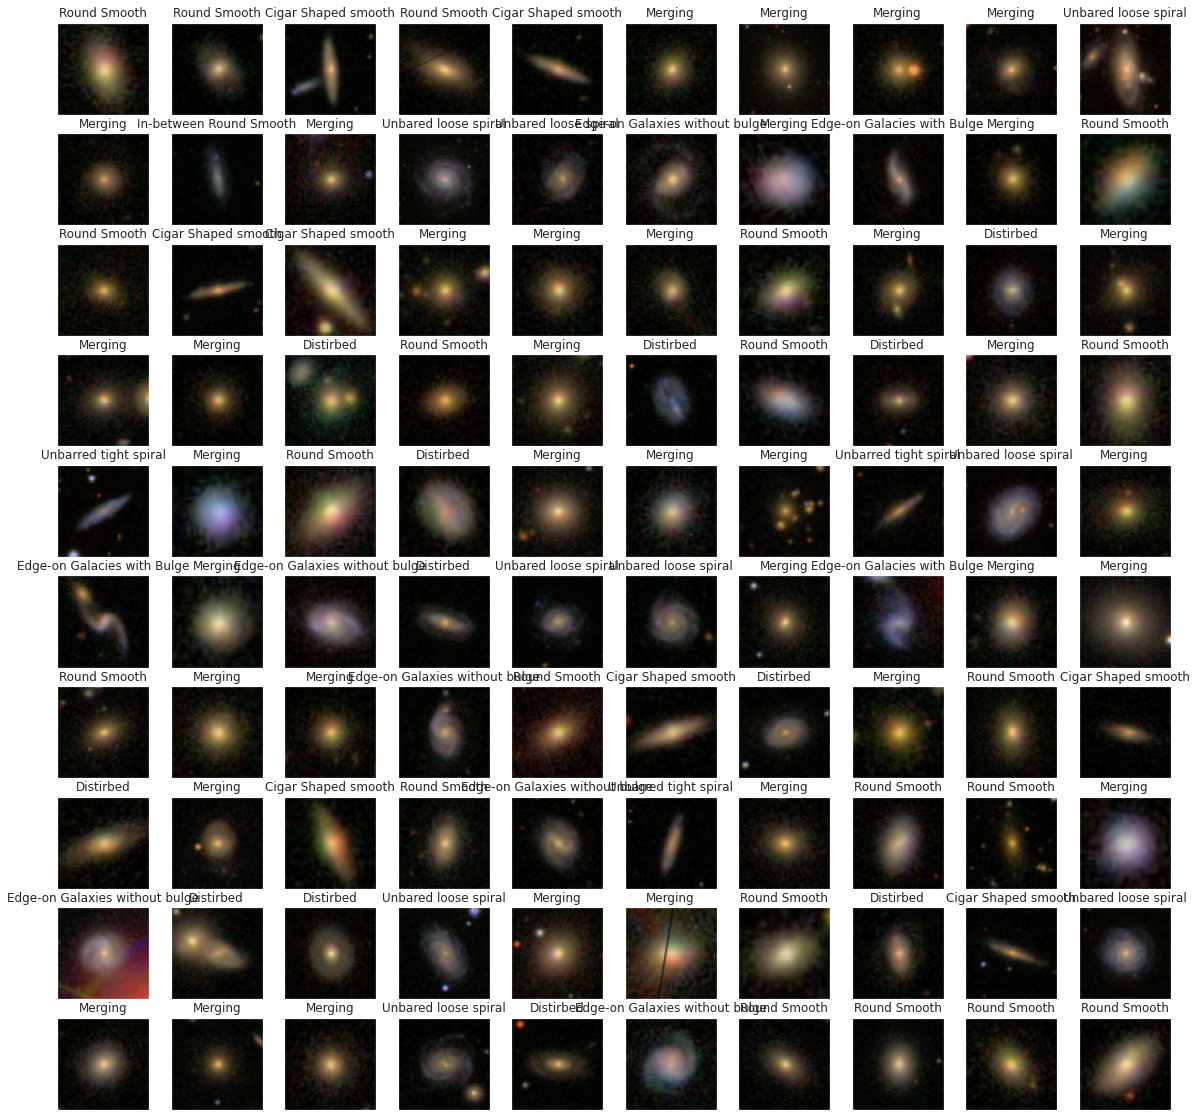

In [11]:
fig, axes = plt.subplots(ncols = 10, nrows = 10, figsize = (20,20))
index = 0
for i in range(10):
  for j in range(10):
    axes[i,j].set_title(imageLabel[labels[index]])
    axes[i,j].imshow(images[index].astype(np.uint8))
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index +=1
plt.show()


2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
(19606, 69, 69, 3)


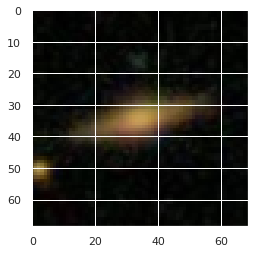

In [12]:
plt.imshow(train_images[3].astype(np.uint8))
print (labels[0])
print (label[0])
print (train_images.shape)

In [13]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_images])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

X_train = X_train/255
X_test = X_test/255

X_train = cv2.flip(X_train,1)
'''sharpening = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
X_train = cv2.filter2D(X_train, -1,sharpening)'''

X_test = cv2.flip(X_test,1)
'''sharpening = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
X_test = cv2.filter2D(X_test, -1,sharpening)'''

'sharpening = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])\nX_test = cv2.filter2D(X_test, -1,sharpening)'

In [14]:
# Defining input shape for CNN
print(np.shape(X_train))

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

input_shape = (X_train.shape[1], X_train.shape[2], 1)

print(input_shape)

(19606, 69, 69)
(69, 69, 1)


In [15]:
print (X_train.size)
print (train_labels.shape)
print (train_labels)

93344166
(19606, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [16]:
print (X_test.shape)

(2179, 69, 69, 1)


In [17]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=90,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)

print (X_train.shape)

(19606, 69, 69, 1)


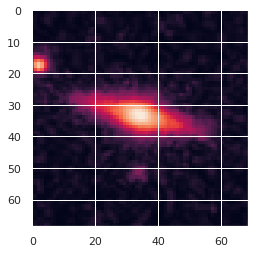

In [18]:
plt.imshow(X_train.reshape(-1, 69, 69)[3])

In [19]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same', input_shape=input_shape))

model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(len(imageLabel), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 69, 69, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0

In [20]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
batch_size=64
history = model.fit(X_train, train_labels, 
                    epochs=30, 
                    steps_per_epoch = int(np.ceil(X_train.shape[0]/ float(64))) , 
                    batch_size=32, 
                    validation_data=(X_test, test_labels), 
                    callbacks=[es])

Epoch 1/30
307/307 [==============================] - 51s 22ms/step - loss: 1.7922 - acc: 0.3223 - val_loss: 1.2207 - val_acc: 0.5466
Epoch 2/30
307/307 [==============================] - 6s 21ms/step - loss: 1.3003 - acc: 0.4939 - val_loss: 1.0352 - val_acc: 0.6030
Epoch 3/30
307/307 [==============================] - 6s 19ms/step - loss: 1.1451 - acc: 0.5721 - val_loss: 0.9045 - val_acc: 0.6746
Epoch 4/30
307/307 [==============================] - 6s 20ms/step - loss: 1.0191 - acc: 0.6237 - val_loss: 0.7725 - val_acc: 0.7237
Epoch 5/30
307/307 [==============================] - 6s 20ms/step - loss: 0.9504 - acc: 0.6531 - val_loss: 0.7722 - val_acc: 0.7228
Epoch 6/30
307/307 [==============================] - 6s 20ms/step - loss: 0.8570 - acc: 0.6930 - val_loss: 0.7234 - val_acc: 0.7380
Epoch 7/30
307/307 [==============================] - 6s 20ms/step - loss: 0.8438 - acc: 0.7037 - val_loss: 0.7106 - val_acc: 0.7393
Epoch 8/30
307/307 [==============================] - 6s 20ms/step -

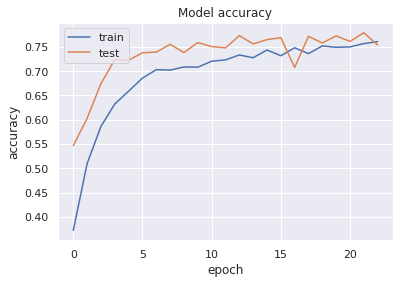

In [21]:
%matplotlib inline
fig = plt.gcf()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('Model_Accuracy.png')

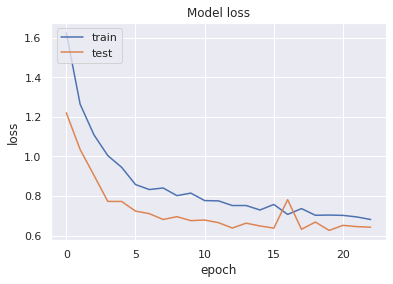

In [22]:
fig = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('Model_Loss.png')

In [23]:
model.predict(X_test)

array([[2.7934739e-01, 1.9456963e-03, 4.3036533e-03, ..., 9.2588682e-03,
        1.2428717e-01, 5.5002528e-01],
       [1.3767104e-01, 1.6008281e-03, 1.2540802e-01, ..., 5.5234414e-03,
        7.8982562e-03, 4.9289916e-02],
       [4.0896729e-02, 4.0822424e-02, 9.1603458e-01, ..., 6.3009217e-04,
        3.2326192e-04, 5.1630236e-04],
       ...,
       [1.0925053e-01, 7.2183870e-03, 8.7061989e-01, ..., 4.1163443e-03,
        1.8836010e-03, 2.5533957e-03],
       [2.7114555e-01, 9.8487772e-03, 6.6699141e-01, ..., 3.8101424e-02,
        6.6652209e-03, 5.1496211e-03],
       [1.9822301e-01, 8.8699092e-04, 2.2613578e-03, ..., 5.5559598e-02,
        5.3318876e-01, 2.0612648e-01]], dtype=float32)